### Import Libraries

In [1]:
import pandas as pd # Data processing 
import numpy as np 
import matplotlib.pyplot as plt # Data visualisation
import seaborn as sns # Data visualisation
import missingno as msno # Missing Data - Data visualisation
from collections import Counter #Counting

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
pip install --upgrade seaborn

In [3]:
!pip install shap

In [4]:
pip install --upgrade shap

Note: you may need to restart the kernel to use updated packages.


#### Load Data Set

In [143]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [144]:
# print the bottom rows
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [145]:
# print the bottom rows
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [146]:
# examine the features ( columns )
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [147]:
# data verification for anomalies and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


#### Observation
•	The dataset shows balanced data quality with no missing values and has consistent data types.

•	The feature types include a mixture of demographic features (age, gender), lifestyle (smoking history), comorbidities (hypertension, hear  disease), and clinical markers (BMI, HbA1c, glucose)

.
•	Only 8.5% of individuals are diabetic, requiring imbalance-handling methods for fair and accurate machine learning modells.

In [148]:
# The column "age" is a float and should be converted to an object

df['age'] = df['age'].astype(int)

In [149]:
# dimensionality (exploring the number of rows and columns)
df.dtypes

gender                  object
age                      int32
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [150]:
# Numerical and statistical Analysis
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.875660,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.535417,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


#### Observations

The dataset reflects a broad and diverse population with meaningful clinical variation.

Key points include:

•	High BMI, HbA1c, and glucose levels are common, making the dataset well-suited for studying metabolic risk factors for diabetes.

•	Hypertension and heart disease occur at lower rates but still provide valuable insight into links between cardiovascular health and diabetes

•	The relatively small proportion of diabetic cases must be addressed to ensure balanced and reliable predictive modeling.

•	Outliers in BMI and the inclusion of neonates in the age variable highlight the need for careful data checks before further analysis.

In [151]:
# categorical statistical Analysis
df.describe(include = ["object", "bool"])

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


### Data Cleaning

In [152]:
# check for missing values
null_vals = df.isnull().sum()
null_vals

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

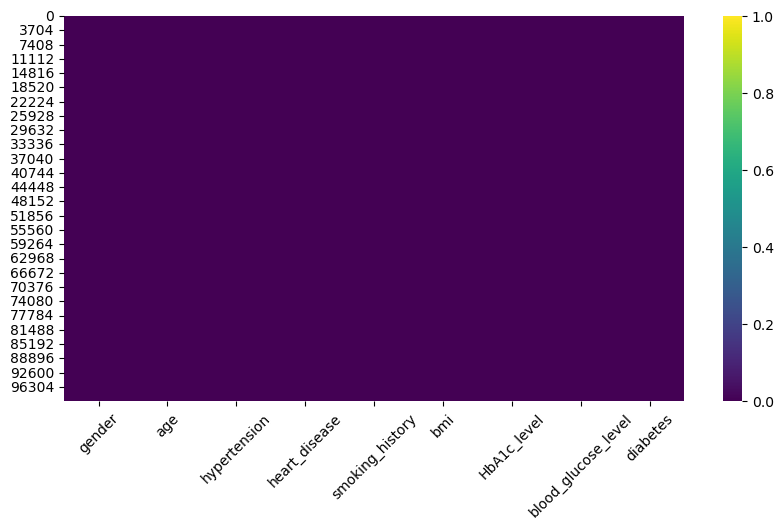

In [153]:
# visualise for missing values

plt.figure(figsize=(10,5))
sns.heatmap(data = df.isnull(), cmap = "viridis", vmin = 0, vmax = 1)
plt.xticks(rotation = 45)
plt.show();

In [238]:
# Group by diagnosis
df.diabetes.unique()

array([0, 1], dtype=int64)

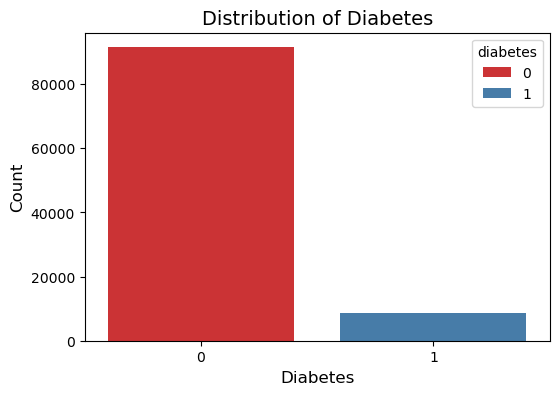

diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64


In [241]:
# Plot the distribution of diabetes
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='diabetes', hue= 'diabetes', palette='Set1')
plt.title('Distribution of Diabetes', fontsize=14)
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Calculate the percentage of diabetic and non-diabetic patients
diabetes_counts = df['diabetes'].value_counts(normalize=True) * 100
print(diabetes_counts)

In [243]:
df.diabetes.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

### Exploratory Data Analysis

#### Numerical Data

In [154]:
numerical_df =df.select_dtypes(exclude = "object")
numerical_df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80,0,1,25.19,6.6,140,0
1,54,0,0,27.32,6.6,80,0
2,28,0,0,27.32,5.7,158,0
3,36,0,0,23.45,5.0,155,0
4,76,1,1,20.14,4.8,155,0


In [155]:
numerical_df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [156]:
numerical_cols = numerical_df.columns
numerical_cols

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

### Univariate Analysis

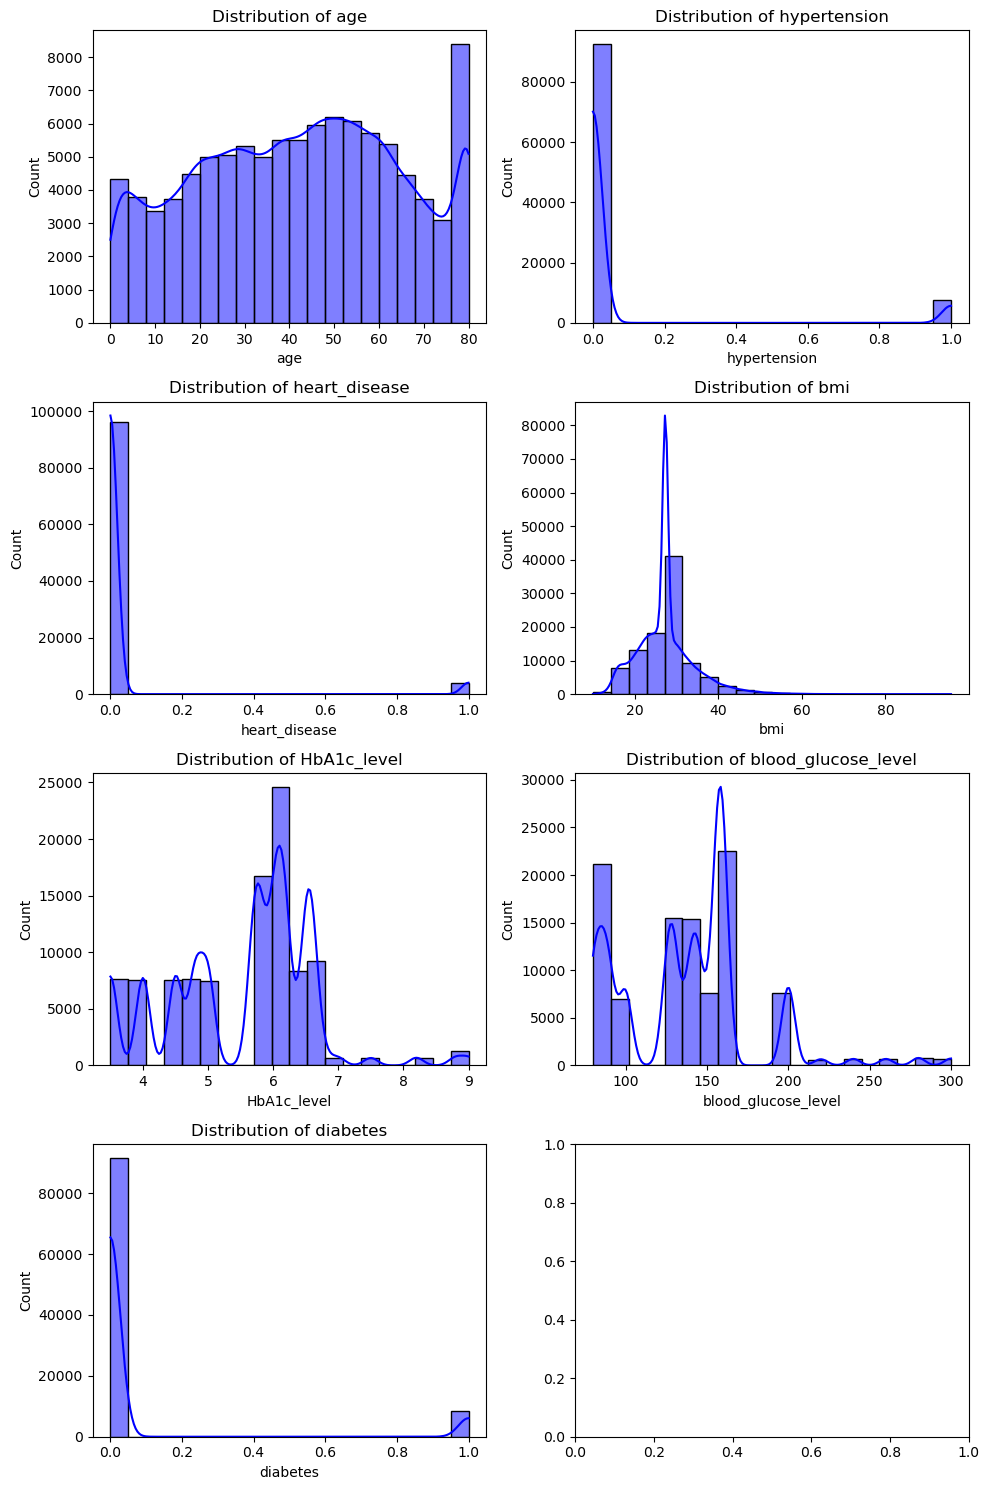

In [157]:
numerical_cols = numerical_df.columns

n_features = len(numerical_cols)
num_cols = 2
num_rows = (n_features +1)//num_cols

fig, axes = plt.subplots(ncols = num_cols, nrows = num_rows, figsize = (10,15))

position = axes.flatten()
for index, name_of_feature in enumerate (numerical_cols):
    sns.histplot(data=df[name_of_feature], bins=20, color="blue", kde=True, ax=position[index])
    position[index].set_title(f"Distribution of {name_of_feature}")
   
plt.tight_layout();

#### Observation

•	The dataset is demographically broad with individuals across all ages, but skewed toward middle-aged and older adults.

•	Hypertension is relatively rare in this population (~10%), which could impact analyses involving comorbidities.

•	Heart disease is relatively rare (~5%), highlighting a class imbalance similar to hypertension.

•	The population shows a high prevalence of overweight and obesity.

•	The majority of individuals fall into the non-diabetic group.

Text(0.5, 1.0, 'Boxplot on Blood Glucose Level')

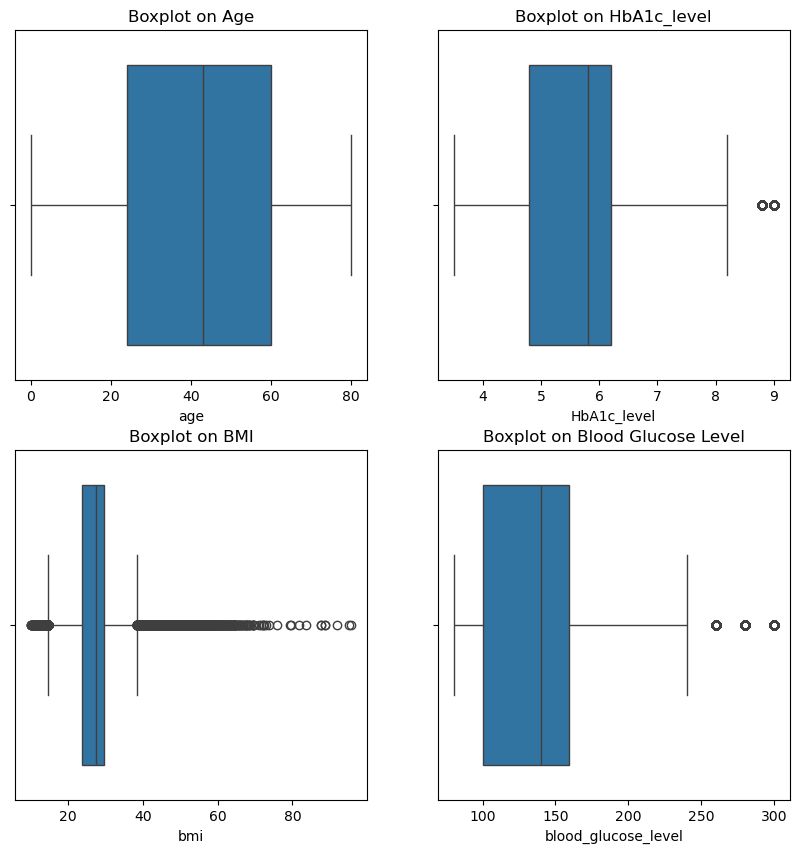

In [158]:
fig,axs = plt.subplots(nrows=2,ncols=2, figsize=(10,10))

sns.boxplot(x="age", data=df, ax=axs[0,0])
axs[0,0].set_title("Boxplot on Age")

sns.boxplot(x="bmi", data=df, ax=axs[1,0])
axs[1,0].set_title("Boxplot on BMI");

sns.boxplot(x="HbA1c_level", data=df, ax=axs[0,1])
axs[0,1].set_title("Boxplot on HbA1c_level")

sns.boxplot(x="blood_glucose_level", data=df, ax=axs[1,1])
axs[1,1].set_title("Boxplot on Blood Glucose Level")

### Observation

•	The dataset contains participants across a wide age spectrum, with most being middle-aged adults. The distribution looks roughly symmetric, suggesting that both younger and older individuals are fairly represented.

•	Most individuals have HbA1c levels within a healthy to mildly elevated range, but the presence of outliers suggests that some participants have significantly higher blood sugar levels.

•	The BMI data is right-skewed, meaning a small number of individuals have very high BMI values and a large number of outliers.

•	The blood glucose level distribution is slightly right-skewed, showing that most participants have glucose levels within or slightly above the normal range, with the presence of high-end outliers.


In [159]:
### Correlation

df.corr(numeric_only = True)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251093,0.233254,0.337747,0.101328,0.110631,0.257933
hypertension,0.251093,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233254,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337747,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101328,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110631,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.257933,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


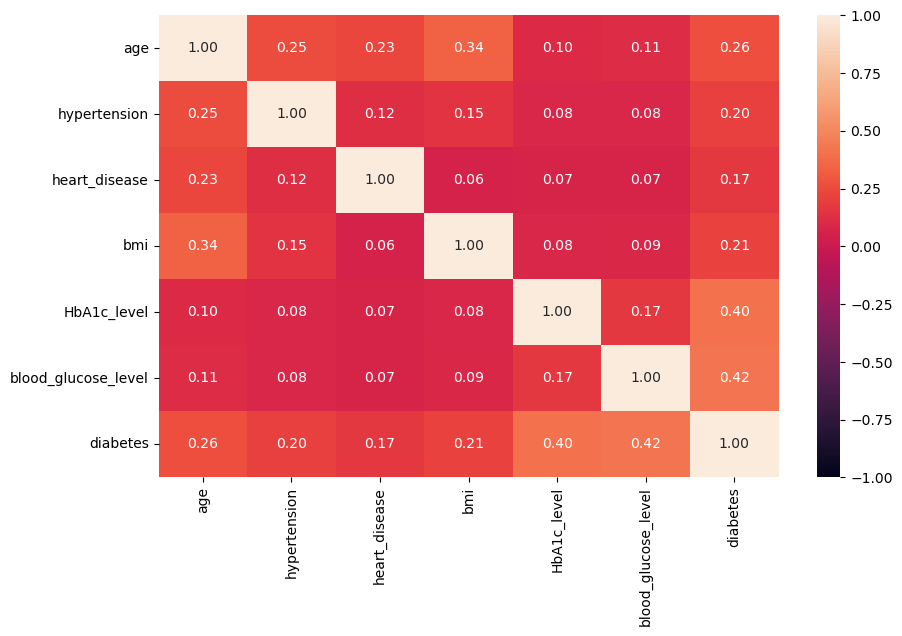

In [160]:
plt.figure(figsize = (10,6))
sns.heatmap(data = numerical_df.corr(), cbar=True, vmin= -1 , vmax= 1, fmt= ".2f", annot=True) 
plt.show();

### Observation

•	Age demonstrates a moderate positive correlation with BMI (r = 0.34), suggesting that body mass tends to increase with age. Additionally, age is positively associated with hypertension (r = 0.25) and heart disease (r = 0.23), indicating that older individuals are more susceptible to cardiovascular conditions. The correlation between age and diabetes (r = 0.26) further implies that advancing age increases the likelihood of developing diabetes.

•	The relationship between hypertension and heart disease (r = 0.12) is positive but weak. Although the correlation strength is weak, it still reflects a clinically meaningful link between the two cardiovascular risk factors.

•	HbA1c level and blood glucose level show moderate positive correlations with diabetes (r = 0.40 and r = 0.42, respectively), emphasizing their diagnostic importance. These findings validate their use as primary predictors in diabetes classification and risk assessment.

•	BMI shows moderate positive correlations with age (r = 0.34) and diabetes (r = 0.21), which suggests that higher body weight is a significant risk factor for diabetes. 

•	Blood glucose level (r = 0.42) and HbA1c_level (r = 0.40) exhibited the strongest positive correlations with diabetes, followed by BMI (r = 0.21), age (r = 0.26), and hypertension (r = 0.20).

•	In summary, the correlation analysis highlights that diabetes is most strongly associated with elevated HbA1c and blood glucose levels, followed by higher BMI, older age, and hy.ertension


<Axes: >

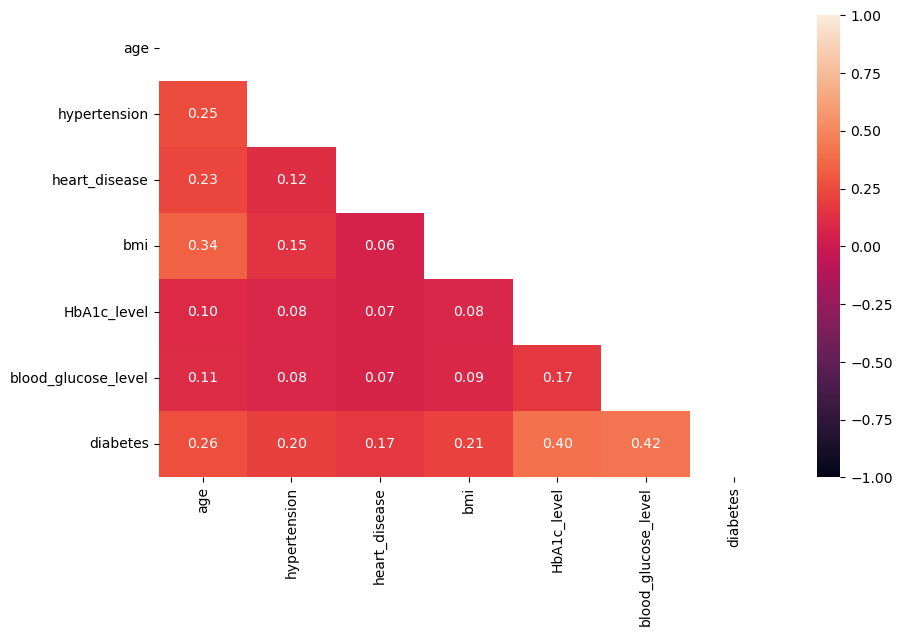

In [161]:
my_mask=np.triu(np.ones_like(numerical_df.corr(),dtype = bool))

plt.figure(figsize=(10,6))
sns.heatmap(data = numerical_df.corr(), cbar=True, vmin = -1, vmax = 1, fmt = ".2f", annot = True, mask = my_mask)

### Categorical Data

In [162]:
categorical_df = df.select_dtypes(include = "object")
categorical_df.head()

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current


In [163]:
categorical_df.columns

Index(['gender', 'smoking_history'], dtype='object')

In [164]:
categorical_cols = categorical_df.columns
categorical_cols

Index(['gender', 'smoking_history'], dtype='object')

### Univariate Analysis

In [165]:
# Gender distribution

gender_count = df["gender"].value_counts()
gender_count

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

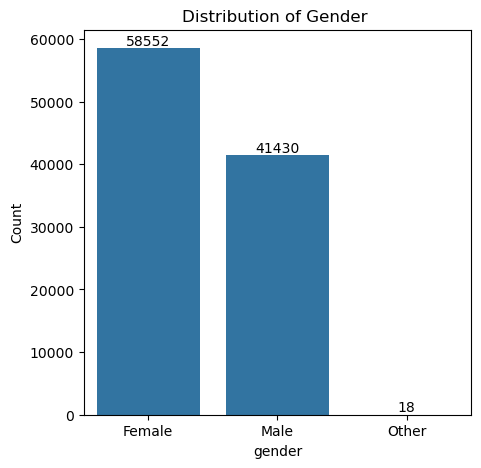

In [166]:
# visualize the gender distribution 

plt.figure(figsize=(5,5))
ax=sns.barplot(x=gender_count.index, y=gender_count.values);
values = df["gender"].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values);

plt.title("Distribution of Gender ")
plt.ylabel("Count")
plt.show();

In [167]:
# Smoking History

smh_count = df["smoking_history"].value_counts()
smh_count

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

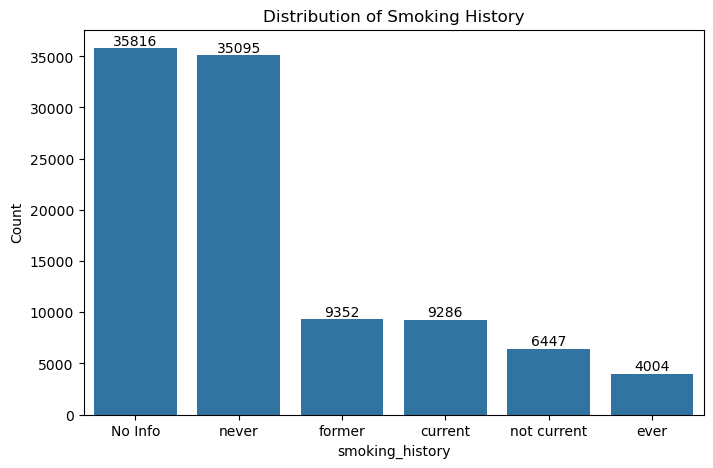

In [168]:
# visualize Smoke History Distribution 

plt.figure(figsize=(8,5))
ax=sns.barplot(x=smh_count.index, y=smh_count.values);
values = df["smoking_history"].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values);

plt.title("Distribution of Smoking History")
plt.ylabel("Count")
plt.show();

### Bivariate Analysis

### Numerical vs Numerical

In [170]:
numerical_df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

Text(0.5, 1.0, 'Comparision between Age and Blood Glucose Level')

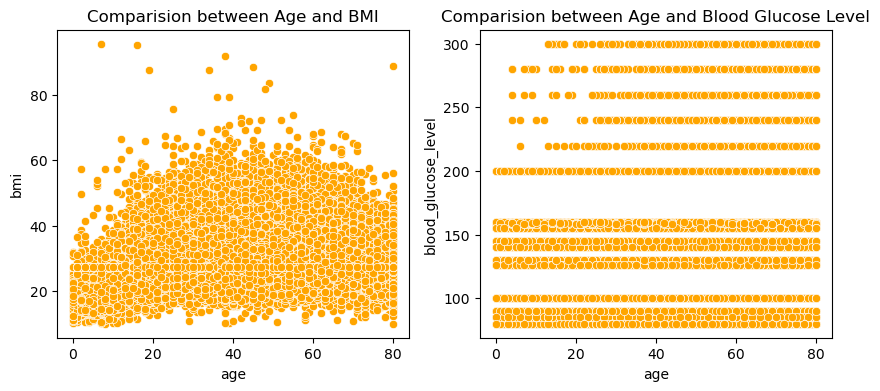

In [169]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

position=axes.flatten()

sns.scatterplot(x=df["age"], y=df["bmi"], color = "orange", ax=position[0])
position[0].set_title(f"Comparision between Age and BMI")

sns.scatterplot(x=df["age"], y=df["blood_glucose_level"], color = "orange", ax=position[1])
position[1].set_title(f"Comparision between Age and Blood Glucose Level")

#### Observation

•	Both graphs indicate that while age alone is not a strong predictor of BMI or glucose levels, middle-aged and older adults tend to show higher BMI and elevated glucose.

### Categorical vs Numerical

In [171]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0


In [172]:
categorical_cols

Index(['gender', 'smoking_history'], dtype='object')

In [173]:
categorical_df.head(2)

,gender,smoking_history
0,Female,never
1,Female,No Info


In [174]:
df["gender"].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

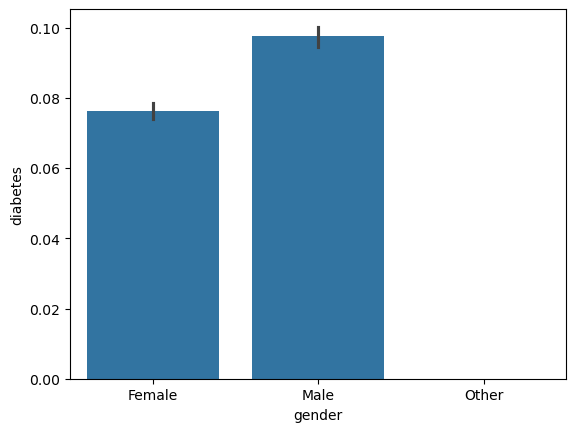

In [175]:
#comparing gender and diabetes

sns.barplot(x="gender", y="diabetes", data=df);

#### Observation

•	Males have a higher proportion of diabetes cases compared to females — around 9.8% of males are diabetic.

•	Females show a slightly lower rate, around 7.6%.

•	The category “Other” shows no recorded cases, likely because it has few or no data points in the dataset.

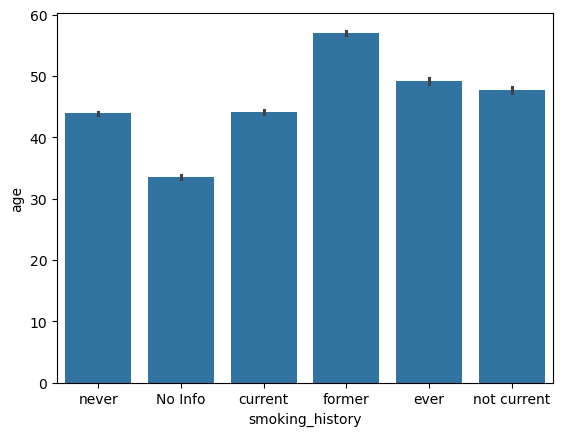

In [176]:
#comparing smoking history and age

sns.barplot(x="smoking_history", y="age", data=df);

#### Observation


•	This bar graph illustrates the relationship between smoking history and average age of individuals.

•	Former smokers have the highest average age (around 57–58 years). This suggests that people who have quit smoking tend to be older, possibly because they smoked earlier in life and latter stopped

•	Ever smokers and not current smokers also have relatively high average ages (around 48–50 years), indicating that these groups consist mostly of middle-aged or older adults

•	Current smokers have a moderate average age (around 44 years), suggesting that smoking is more common among younger or middle-aged adults.

•	Never smokers show a similar average age (around 43–44 years), meaning that many non-smokers are also in the middle-age range

•	The “No Info” group has the lowest average age (around 33 years), which might imply missing data for younger participants or incomplete smoking history reporting.

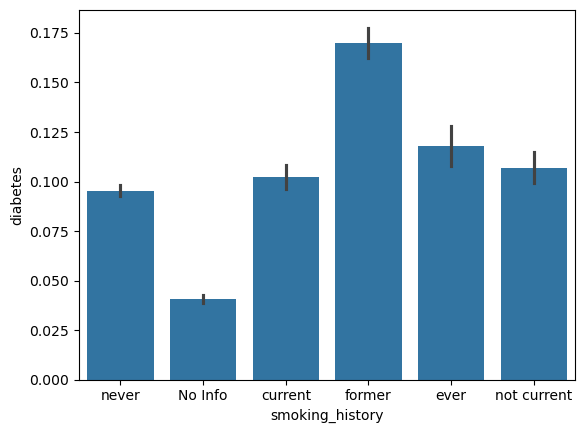

In [177]:
#comparing smoking history and diabetes

sns.barplot(x="smoking_history", y="diabetes", data=df);

#### Observation

•	The bar graph shows the relationship between smoking history and diabetes prevalence. 

•	Former smokers have the highest diabetes rate (around 17%), suggesting a strong link between past smoking and diabetes risk and no smoking information have the lowest recorded rate (about 4%) but this category likely reflects missing or incomplete data rather than a true pattern.

•	Never smokers have a lower diabetes rate (about 9%), suggesting that not smoking may be protective. 

•	Current smokers, ever smokers, and not current smokers also show moderate diabetes rates (around 10–12%), indicating continued risk even after changing smoking habits. 

### Bivariate Analysis

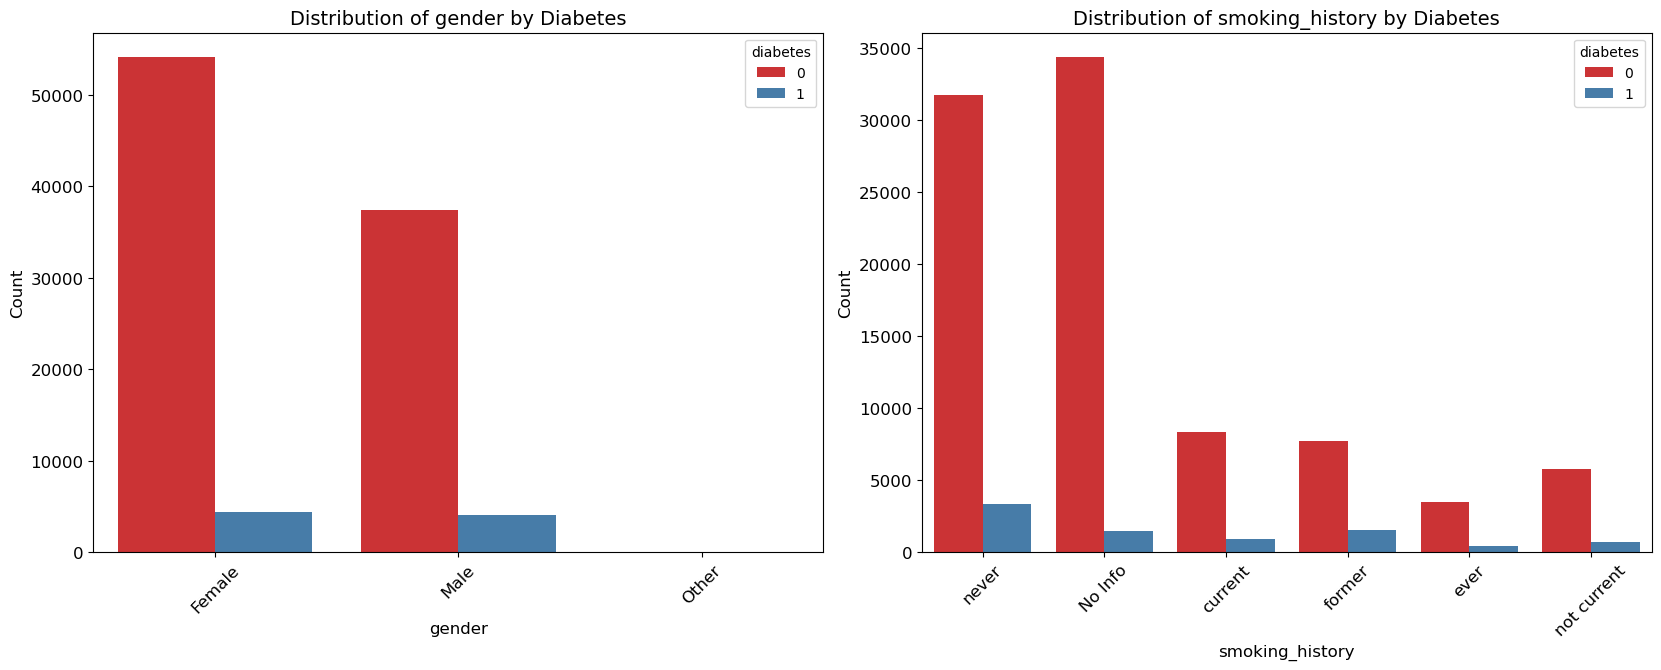

In [178]:
#set up the plot grid
plt.figure(figsize=(25,25))

# Create bar plots for each categorical feature with default as hue
for index, feature in enumerate (categorical_cols, 1):
    plt.subplot(4,3,index)
    sns.countplot (data=df, x=feature, hue='diabetes', palette='Set1')
    plt.title(f'Distribution of {feature} by Diabetes', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
plt.tight_layout()
plt.show()

### Observation

•	Both males and females without diabetes (red bars, diabetes = 0) far outnumber those with diabetes (blue bars, diabetes = 1). Females represent the largest proportion of the dataset overall, both among diabetic and non-diabetic individuals. The “Other” gender category is nearly negligible, suggesting either very few entries or missing data.


•	The majority of individuals, regardless of diabetes status, are categorized as “never” smokers or with “no information” and the counts for “current,” “former,” and “ever” smokers are significantly lower. Among all smoking categories, non-diabetic individuals (red bars) vastly outnumber diabetic individuals (blue bars). However, within diabetic cases (blue bars), the proportion of “current” and “former” smokers is slightly higher compared to non-diabetics.

### Modeling Diabetes Prediction

#### Data Pre-processing/Feature Engineering

In [181]:
df.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0


In [ ]:
### Features and Label

# x = Features
# y = Label

In [182]:
x = df.drop(['diabetes'], axis=1)
y = df['diabetes']

In [184]:
x.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80,0,1,never,25.19,6.6,140
1,Female,54,0,0,No Info,27.32,6.6,80
2,Male,28,0,0,never,27.32,5.7,158


In [183]:
y.head(3)

0    0
1    0
2    0
Name: diabetes, dtype: int64

### Encoding all Categorical variables

In [185]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [186]:
for column_name in categorical_cols:
    x[column_name]=encoder.fit_transform(df[column_name])
x.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80,0,1,4,25.19,6.6,140
1,0,54,0,0,0,27.32,6.6,80
2,1,28,0,0,4,27.32,5.7,158


### Data Splitting

In [187]:
print(f"Data contained {len(x)} records before splitting")

Data contained 100000 records before splitting


In [188]:
# Splitting Data into Training and Test sets 

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [189]:
xtrain.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75220,1,73,0,0,3,24.77,3.5,80
48955,1,80,0,0,4,24.60,5.7,145
44966,0,38,0,0,2,24.33,4.0,158
13568,0,26,0,0,5,18.87,5.0,100
92727,0,61,1,0,1,22.11,4.5,85


In [190]:
xtest.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75721,0,13,0,0,0,20.82,5.8,126
80184,0,3,0,0,0,21.00,5.0,145
19864,1,63,0,0,3,25.32,3.5,200
76699,0,2,0,0,4,17.43,6.1,126
92991,0,33,0,0,5,40.08,6.2,200


In [191]:
len(xtest) == len(ytest)

True

In [192]:
len(xtrain) == len(ytrain)

True

### Model Training

In [193]:
# Initialize and train models

Classifiers = [[SGDClassifier(random_state = 42), 'sdg_model'], 
               [DecisionTreeClassifier(random_state = 42), 'dt_model'], 
               [LogisticRegression(random_state = 42, max_iter=1000),'lr_model'], 
               [RandomForestClassifier(random_state = 42), 'rf_model'],
               [XGBClassifier(random_state = 42), 'xgb_model']
              ]

In [194]:
Classifiers

[[SGDClassifier(random_state=42), 'sdg_model'],
 [DecisionTreeClassifier(random_state=42), 'dt_model'],
 [LogisticRegression(max_iter=1000, random_state=42), 'lr_model'],
 [RandomForestClassifier(random_state=42), 'rf_model'],
 [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=None,
                n_jobs=None, num_parallel_tree=N

<---sdg_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    0.97946   0.94107   0.95988     18292
           1    0.55546   0.78864   0.65183      1708

    accuracy                        0.92805     20000
   macro avg    0.76746   0.86485   0.80585     20000
weighted avg    0.94325   0.92805   0.93357     20000

Confusion Matrix: 
 [[17214  1078]
 [  361  1347]]
Accuracy scores: [0.9548125 0.9590625 0.9579375 0.9580625 0.94325  ]
Mean accuracy: 95.46%

Precision scores: [0.78122232 0.93128834 0.80444444 0.9195122  0.64633355]
Mean precision: 81.66%

Recall scores: [0.64948454 0.55891016 0.66642121 0.55481972 0.73289183]
Mean recall: 63.25%

F1 scores: [0.7092883  0.6985734  0.72895691 0.69206058 0.68689655]
Mean f1: 70.32%


Cross-Validation Scores: [0.9548125 0.9590625 0.9579375 0.9580625 0.94325  ]
Mean CV Score - Unscaled Model Training: 95.46%
--------------------------------------------------


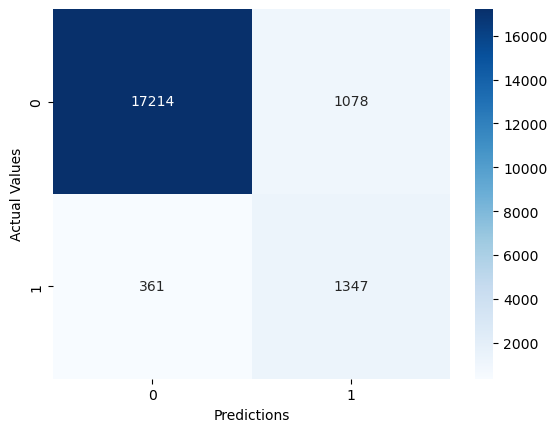

--------------------------------------------------
<---dt_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    0.97549   0.97245   0.97396     18292
           1    0.71445   0.73829   0.72617      1708

    accuracy                        0.95245     20000
   macro avg    0.84497   0.85537   0.85007     20000
weighted avg    0.95319   0.95245   0.95280     20000

Confusion Matrix: 
 [[17788   504]
 [  447  1261]]
Accuracy scores: [0.9500625 0.9519375 0.952375  0.9495625 0.9504375]
Mean accuracy: 95.09%

Precision scores: [0.69808646 0.70783345 0.71285714 0.68956044 0.69707521]
Mean precision: 70.11%

Recall scores: [0.72533137 0.73858616 0.73490427 0.73877851 0.73657101]
Mean recall: 73.48%

F1 scores: [0.71144818 0.72288288 0.72371284 0.71332149 0.71627907]
Mean f1: 71.75%


Cross-Validation Scores: [0.9500625 0.9519375 0.952375  0.9495625 0.9504375]
Mean CV Score - Unscaled Model Training: 95.09%
----------------------------------

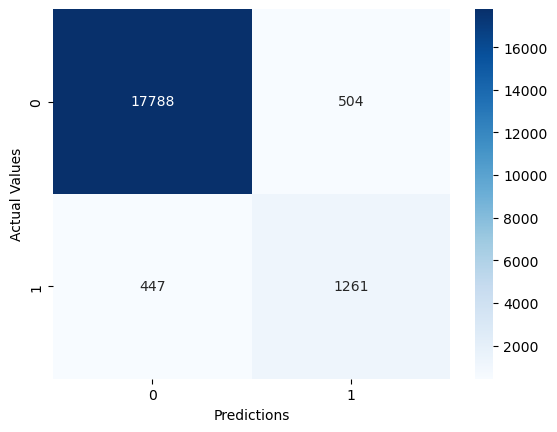

--------------------------------------------------
<---lr_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    0.96487   0.99098   0.97775     18292
           1    0.86397   0.61358   0.71756      1708

    accuracy                        0.95875     20000
   macro avg    0.91442   0.80228   0.84766     20000
weighted avg    0.95625   0.95875   0.95553     20000

Confusion Matrix: 
 [[18127   165]
 [  660  1048]]
Accuracy scores: [0.9598125 0.960875  0.96175   0.960375  0.9606875]
Mean accuracy: 96.07%

Precision scores: [0.87592008 0.86746988 0.87151394 0.86505539 0.87397541]
Mean precision: 87.08%

Recall scores: [0.61340206 0.63622975 0.6443299  0.63208241 0.6276674 ]
Mean recall: 63.07%

F1 scores: [0.72152447 0.73406967 0.74089754 0.73044218 0.73062099]
Mean f1: 73.15%


Cross-Validation Scores: [0.9598125 0.960875  0.96175   0.960375  0.9606875]
Mean CV Score - Unscaled Model Training: 96.07%
----------------------------------

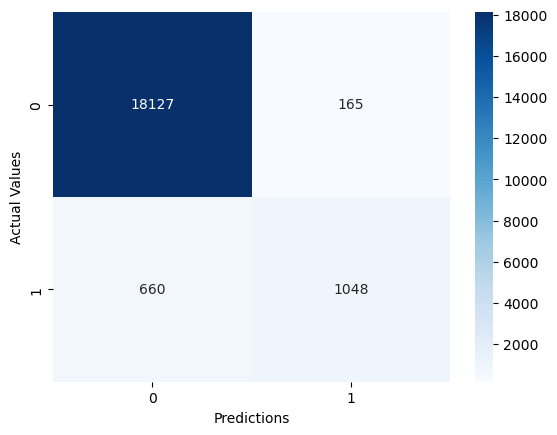

--------------------------------------------------
<---rf_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    0.97191   0.99672   0.98416     18292
           1    0.95165   0.69145   0.80095      1708

    accuracy                        0.97065     20000
   macro avg    0.96178   0.84409   0.89255     20000
weighted avg    0.97018   0.97065   0.96851     20000

Confusion Matrix: 
 [[18232    60]
 [  527  1181]]
Accuracy scores: [0.9704375 0.9691875 0.97125   0.97025   0.970625 ]
Mean accuracy: 97.04%

Precision scores: [0.95950156 0.93908629 0.95630081 0.9473151  0.9615784 ]
Mean precision: 95.28%

Recall scores: [0.68041237 0.68114875 0.69293078 0.68800589 0.68138337]
Mean recall: 68.48%

F1 scores: [0.79620853 0.789586   0.80358668 0.79710145 0.79758829]
Mean f1: 79.68%


Cross-Validation Scores: [0.9704375 0.9691875 0.97125   0.97025   0.970625 ]
Mean CV Score - Unscaled Model Training: 97.04%
----------------------------------

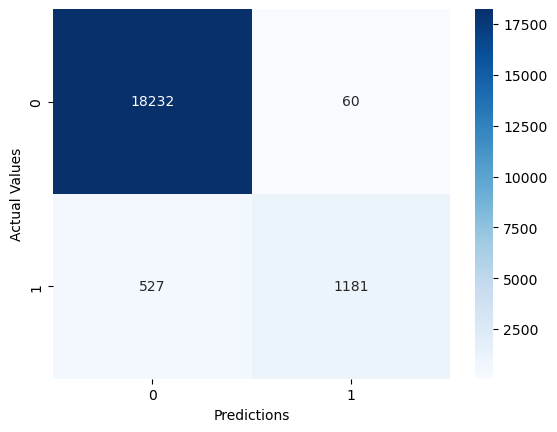

--------------------------------------------------
<---xgb_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    0.97217   0.99688   0.98437     18292
           1    0.95414   0.69438   0.80380      1708

    accuracy                        0.97105     20000
   macro avg    0.96316   0.84563   0.89408     20000
weighted avg    0.97063   0.97105   0.96895     20000

Confusion Matrix: 
 [[18235    57]
 [  522  1186]]
Accuracy scores: [0.9700625 0.97      0.971125  0.97175   0.9696875]
Mean accuracy: 97.05%

Precision scores: [0.95544041 0.93812375 0.9516129  0.95214357 0.93875502]
Mean precision: 94.72%

Recall scores: [0.67893962 0.6921944  0.69513991 0.70272259 0.68800589]
Mean recall: 69.14%

F1 scores: [0.79380112 0.79661017 0.80340426 0.80863675 0.7940552 ]
Mean f1: 79.93%


Cross-Validation Scores: [0.9700625 0.97      0.971125  0.97175   0.9696875]
Mean CV Score - Unscaled Model Training: 97.05%
---------------------------------

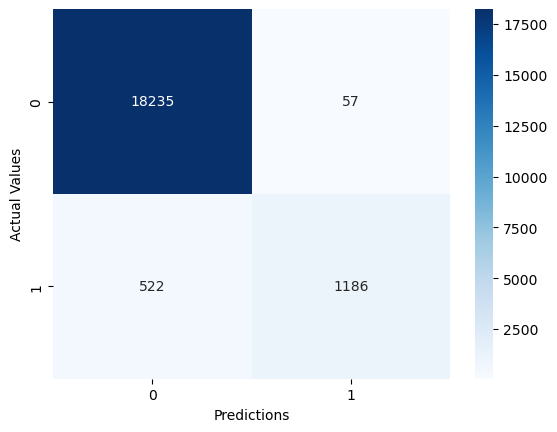

--------------------------------------------------


In [195]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate

for Classifier in Classifiers:
    model = Classifier[0]
    model_name = Classifier[1]
    print(f"<---{model_name}--->")
    
    # Fit model
    model.fit(xtrain, ytrain)
    model_pred = model.predict(xtest)

    # Classification report & confusion matrix
    report = classification_report(ytest, model_pred, digits=5)
    matrix = confusion_matrix(ytest, model_pred)

    print("Classification Report: \n", report)
    print("Confusion Matrix: \n", matrix)

    # multiple metrics
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    cv_results = cross_validate(model, xtrain, ytrain, cv=5, scoring=scoring)

    for metric in scoring:
        scores = cv_results[f'test_{metric}']
        print(f"{metric.capitalize()} scores: {scores}")
        print(f"Mean {metric}: {scores.mean()*100:.2f}%\n")

     # Cross-Validate Models
    cv_scores = cross_val_score(model, xtrain, ytrain, cv = 5)
    mean_cv_score_percentage = cv_scores.mean() * 100
    print(f'\nCross-Validation Scores: {cv_scores}')
    print(f'Mean CV Score - Unscaled Model Training: {mean_cv_score_percentage:.2f}%')
    print("-" * 50)

    # Heatmap
    sns.heatmap(matrix, annot=True, fmt='g', cmap="Blues")
    plt.xlabel("Predictions")
    plt.ylabel("Actual Values")
    plt.show()
    print("-" * 50)

### Observation

•	The models performed relatively well, xgb_model had the best performance with the highest accuracy (97.05%) and F1-score (79.93%).

#### Feature Scaling

In [197]:
from sklearn.preprocessing import StandardScaler

# Initialize Scaler
scaler = MinMaxScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.fit_transform(xtest)

In [198]:
# Check if scaling is successful the minimum and maximum values for each feature
print("Minimum values per feature:\n", xtrain_scaled.min(axis=0))
print("Maximum values per feature:\n", xtrain_scaled.max(axis=0))

Minimum values per feature:
 [0. 0. 0. 0. 0. 0. 0. 0.]
Maximum values per feature:
 [1. 1. 1. 1. 1. 1. 1. 1.]


#### Train Models

In [199]:
# Initialize and train models

Classifiers = [[SGDClassifier(random_state = 42), 'sdg_model'], 
               [DecisionTreeClassifier(random_state = 42), 'dt_model'], 
               [LogisticRegression(random_state = 42, max_iter=1000),'lr_model'], 
               [RandomForestClassifier(random_state = 42), 'rf_model'],
               [XGBClassifier(random_state = 42), 'xgb_model']
              ]

In [200]:
Classifiers

[[SGDClassifier(random_state=42), 'sdg_model'],
 [DecisionTreeClassifier(random_state=42), 'dt_model'],
 [LogisticRegression(max_iter=1000, random_state=42), 'lr_model'],
 [RandomForestClassifier(random_state=42), 'rf_model'],
 [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=None,
                n_jobs=None, num_parallel_tree=N

<---sdg_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    0.95730   0.99759   0.97703     18292
           1    0.95309   0.52342   0.67574      1708

    accuracy                        0.95710     20000
   macro avg    0.95519   0.76051   0.82638     20000
weighted avg    0.95694   0.95710   0.95130     20000

Confusion Matrix: 
 [[18248    44]
 [  814   894]]
Accuracy scores: [0.9581875 0.9600625 0.9623125 0.961125  0.95975  ]
Mean accuracy: 96.03%

Precision scores: [0.94337194 0.92951016 0.90722762 0.88667366 0.88648649]
Mean precision: 91.07%

Recall scores: [0.53976436 0.57290133 0.61929308 0.62178072 0.60338484]
Mean recall: 59.14%

F1 scores: [0.68665105 0.70888383 0.73610503 0.73096886 0.71803853]
Mean f1: 71.61%


Cross-Validation Scores: [0.9581875 0.9600625 0.9623125 0.961125  0.95975  ]
Mean CV Score - Scaled Model Training: 96.03%
--------------------------------------------------


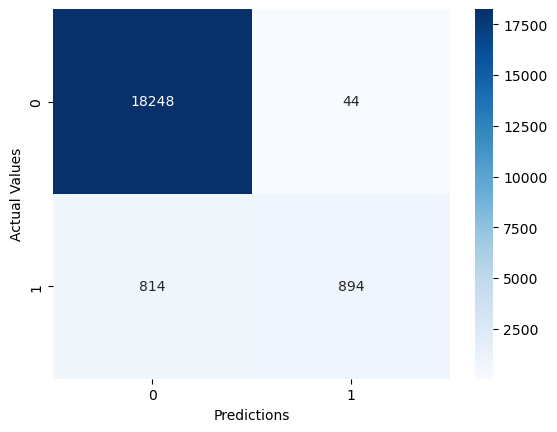

--------------------------------------------------
<---dt_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    0.97595   0.97403   0.97499     18292
           1    0.72764   0.74297   0.73523      1708

    accuracy                        0.95430     20000
   macro avg    0.85180   0.85850   0.85511     20000
weighted avg    0.95475   0.95430   0.95452     20000

Confusion Matrix: 
 [[17817   475]
 [  439  1269]]
Accuracy scores: [0.949875  0.9516875 0.952375  0.9498125 0.950625 ]
Mean accuracy: 95.09%

Precision scores: [0.69660537 0.70613108 0.71285714 0.69172414 0.69853454]
Mean precision: 70.12%

Recall scores: [0.72533137 0.73784978 0.73490427 0.73804268 0.73657101]
Mean recall: 73.45%

F1 scores: [0.71067821 0.72164206 0.72371284 0.71413314 0.71704871]
Mean f1: 71.74%


Cross-Validation Scores: [0.949875  0.9516875 0.952375  0.9498125 0.950625 ]
Mean CV Score - Scaled Model Training: 95.09%
------------------------------------

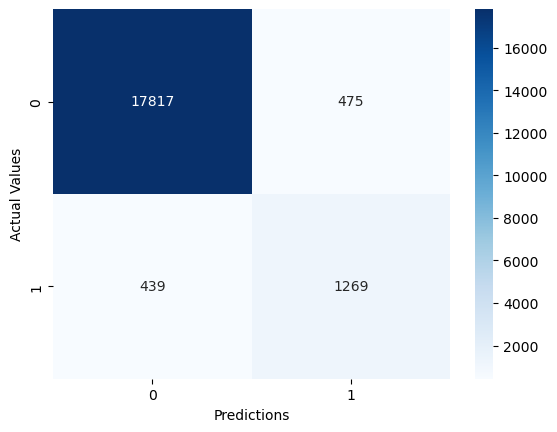

--------------------------------------------------
<---lr_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    0.96359   0.99257   0.97786     18292
           1    0.88256   0.59836   0.71319      1708

    accuracy                        0.95890     20000
   macro avg    0.92307   0.79546   0.84553     20000
weighted avg    0.95667   0.95890   0.95526     20000

Confusion Matrix: 
 [[18156   136]
 [  686  1022]]
Accuracy scores: [0.959375  0.9608125 0.961875  0.9605    0.9604375]
Mean accuracy: 96.06%

Precision scores: [0.87901499 0.872579   0.87931034 0.87358684 0.87655602]
Mean precision: 87.62%

Recall scores: [0.60456554 0.63033873 0.63843888 0.6254599  0.62178072]
Mean recall: 62.41%

F1 scores: [0.71640489 0.73193673 0.73976109 0.72898799 0.72750753]
Mean f1: 72.89%


Cross-Validation Scores: [0.959375  0.9608125 0.961875  0.9605    0.9604375]
Mean CV Score - Scaled Model Training: 96.06%
------------------------------------

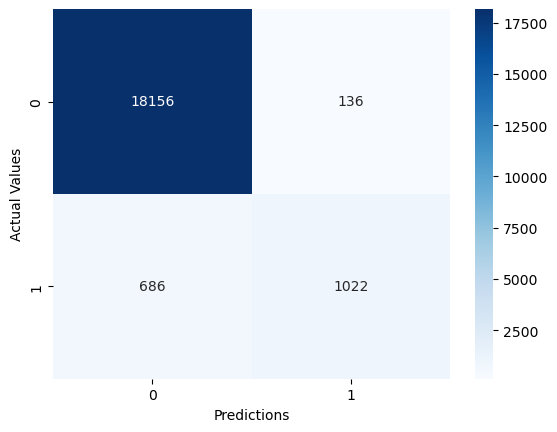

--------------------------------------------------
<---rf_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    0.97137   0.99792   0.98447     18292
           1    0.96854   0.68501   0.80247      1708

    accuracy                        0.97120     20000
   macro avg    0.96996   0.84147   0.89347     20000
weighted avg    0.97113   0.97120   0.96893     20000

Confusion Matrix: 
 [[18254    38]
 [  538  1170]]
Accuracy scores: [0.9703125 0.969125  0.971125  0.97025   0.970625 ]
Mean accuracy: 97.03%

Precision scores: [0.95846314 0.93813387 0.95528455 0.9473151  0.9615784 ]
Mean precision: 95.22%

Recall scores: [0.67967599 0.68114875 0.6921944  0.68800589 0.68138337]
Mean recall: 68.45%

F1 scores: [0.79534683 0.78924915 0.80273271 0.79710145 0.79758829]
Mean f1: 79.64%


Cross-Validation Scores: [0.9703125 0.969125  0.971125  0.97025   0.970625 ]
Mean CV Score - Scaled Model Training: 97.03%
------------------------------------

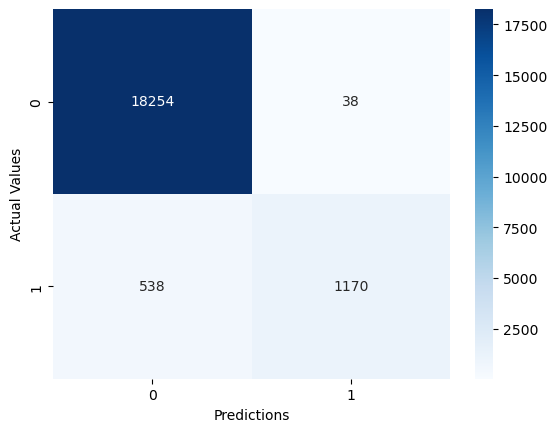

--------------------------------------------------
<---xgb_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    0.97198   0.99754   0.98459     18292
           1    0.96333   0.69204   0.80545      1708

    accuracy                        0.97145     20000
   macro avg    0.96765   0.84479   0.89502     20000
weighted avg    0.97124   0.97145   0.96930     20000

Confusion Matrix: 
 [[18247    45]
 [  526  1182]]
Accuracy scores: [0.9700625 0.97      0.971125  0.97175   0.9696875]
Mean accuracy: 97.05%

Precision scores: [0.95544041 0.93812375 0.9516129  0.95214357 0.93875502]
Mean precision: 94.72%

Recall scores: [0.67893962 0.6921944  0.69513991 0.70272259 0.68800589]
Mean recall: 69.14%

F1 scores: [0.79380112 0.79661017 0.80340426 0.80863675 0.7940552 ]
Mean f1: 79.93%


Cross-Validation Scores: [0.9700625 0.97      0.971125  0.97175   0.9696875]
Mean CV Score - Scaled Model Training: 97.05%
-----------------------------------

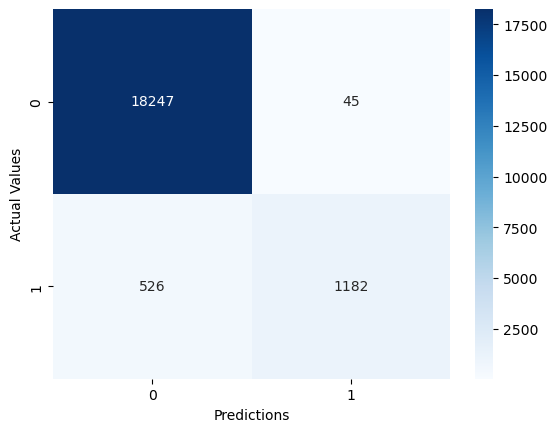

--------------------------------------------------


In [201]:
for Classifier in Classifiers:
    model = Classifier[0]
    model_name = Classifier[1]
    print(f"<---{model_name}--->")
    
    # Fit model
    model.fit(xtrain_scaled, ytrain)
    model_pred = model.predict(xtest_scaled)

    # Classification report & confusion matrix
    report = classification_report(ytest, model_pred, digits=5)
    matrix = confusion_matrix(ytest, model_pred)

    print("Classification Report: \n", report)
    print("Confusion Matrix: \n", matrix)
    
    # multiple metrics
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    cv_results = cross_validate(model, xtrain_scaled, ytrain, cv=5, scoring= scoring)

    for metric in scoring:
        scores = cv_results[f'test_{metric}']
        print(f"{metric.capitalize()} scores: {scores}")
        print(f"Mean {metric}: {scores.mean()*100:.2f}%\n")

    # Cross-Validate Models
    cv_scores = cross_val_score(model, xtrain_scaled, ytrain, cv = 5)
    mean_cv_score_percentage = cv_scores.mean() * 100
    print(f'\nCross-Validation Scores: {cv_scores}')
    print(f'Mean CV Score - Scaled Model Training: {mean_cv_score_percentage:.2f}%')
    print("-" * 50)
    
    # Heatmap
    sns.heatmap(matrix, annot=True, fmt='g', cmap="Blues")
    plt.xlabel("Predictions")
    plt.ylabel("Actual Values")
    plt.show()
    print("-" * 50)

#### Observation

•	After feature scaling, xgb_model still outperformed other models with the best F1-score (79.93%) and accuracy (97.05%). It maintains a strong balance between recall and precision, making it the most reliable model for diabetes prediction.

### Improving Model Performance using hyperparameter tuning and class weights 

##### Cross Validation using RandomSearchCV

In [202]:
from sklearn.model_selection import RandomizedSearchCV

In [203]:
Classifiers

[[SGDClassifier(random_state=42), 'sdg_model'],
 [DecisionTreeClassifier(random_state=42), 'dt_model'],
 [LogisticRegression(max_iter=1000, random_state=42), 'lr_model'],
 [RandomForestClassifier(random_state=42), 'rf_model'],
 [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=None,
                n_jobs=None, num_parallel_tree=N

In [66]:
Classifiers[0][0]

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [67]:
SGDClassifier()

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [68]:
sdg_model = SGDClassifier(random_state=42)

In [69]:
from scipy.stats import loguniform

parameter_distributions = {
    'loss': ['hinge', 'log_loss', 'modified_huber'],
    'max_iter': [1000, 2000, 3000, 4000, 5000],  
    'alpha': np.logspace(-5, 0, 6),              
    'learning_rate': ['optimal', 'adaptive', 'constant'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'eta0': loguniform(1e-4, 1e-1),
    'class_weight':[{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:4}]
}

In [70]:
sdg_rs = RandomizedSearchCV(estimator= sdg_model, param_distributions=parameter_distributions, random_state=42, verbose=2, n_iter=50, n_jobs =-1, cv=5, error_score='raise')

In [71]:
sdg_rs.fit(xtrain_scaled, ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,estimator,SGDClassifier(random_state=42)
,param_distributions,"{'alpha': array([1.e-05...e-01, 1.e+00]), 'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}, ...], 'eta0': <scipy.stats....0018A077315D0>, 'learning_rate': ['optimal', 'adaptive', ...], ...}"
,n_iter,50
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,'raise'


In [72]:
print('Best Parameters:', sdg_rs.best_params_)

Best Parameters: {'alpha': 0.001, 'class_weight': {0: 1, 1: 2}, 'eta0': 0.0004707690774317695, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 5000, 'penalty': 'elasticnet'}


In [73]:
print("Best cross-val score:", sdg_rs.best_score_)

Best cross-val score: 0.9598125000000002


In [74]:
print("Test Set Score:", sdg_rs.score(xtest_scaled, ytest))

Test Set Score: 0.9587


In [75]:
best_sdg_model = sdg_rs.best_estimator_

#### Model Evaluation after Hyper parameter tuning

Classification Report: 
               precision    recall  f1-score   support

           0    0.96427   0.99158   0.97774     18292
           1    0.87059   0.60656   0.71498      1708

    accuracy                        0.95870     20000
   macro avg    0.91743   0.79907   0.84636     20000
weighted avg    0.95627   0.95870   0.95530     20000

Confusion Matrix: 
 [[18138   154]
 [  672  1036]]
Accuracy scores: [0.95925   0.9593125 0.9610625 0.9606875 0.95875  ]
Mean accuracy: 95.98%

Precision scores: [0.85370741 0.85888325 0.87009063 0.87244898 0.84984985]
Mean precision: 86.10%

Recall scores: [0.62739323 0.62297496 0.63622975 0.62913907 0.62472406]
Mean recall: 62.81%

F1 scores: [0.72325976 0.72215109 0.73500638 0.73108166 0.72010178]
Mean f1: 72.63%


Cross-Validation Scores: [0.95925   0.9593125 0.9610625 0.9606875 0.95875  ]
Mean CV Score - sdg Model: 95.98%
--------------------------------------------------


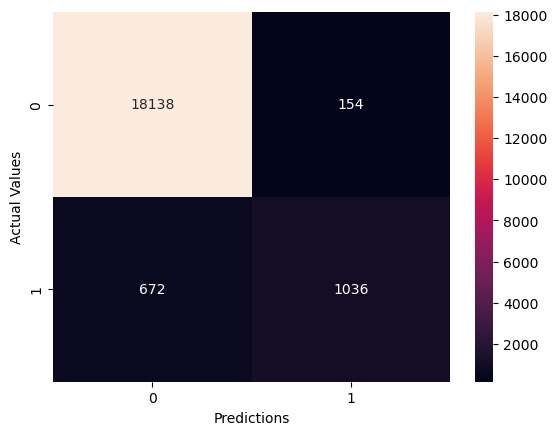

In [206]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict
sdg_pred = best_sdg_model.predict(xtest_scaled)

# Classification report & confusion matrix
report = classification_report(ytest, sdg_pred, digits=5)
matrix = confusion_matrix(ytest, sdg_pred)

print("Classification Report: \n", report)
print("Confusion Matrix: \n", matrix)

# multiple metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(best_sdg_model, xtrain_scaled, ytrain, cv=5, scoring=scoring)

for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize()} scores: {scores}")
    print(f"Mean {metric}: {scores.mean()*100:.2f}%\n")

# Cross-Validate Models
cv_scores = cross_val_score(best_sdg_model, xtrain_scaled, ytrain, cv = 5)
mean_cv_score_percentage = cv_scores.mean() * 100
print(f'\nCross-Validation Scores: {cv_scores}')
print(f'Mean CV Score - sdg Model: {mean_cv_score_percentage:.2f}%')
print("-" * 50)

# Heatmap
sns.heatmap(matrix, annot = True, fmt = 'g')
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.show()

### Decision Tree

In [205]:
Classifiers[1][0]

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [204]:
DecisionTreeClassifier()

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [207]:
dt_model = DecisionTreeClassifier(random_state=42)

In [208]:
from scipy.stats import randint

param_dist_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],   
    'max_depth': randint(1, 20),             
    'min_samples_split': randint(2, 20),                
    'min_samples_leaf': randint(1, 20),               
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight':[{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:4}]
}

In [209]:
# Initializing Grid Search

dt_rs = RandomizedSearchCV(estimator= dt_model, param_distributions = param_dist_dt, random_state=42, verbose=2, n_iter=20, cv=5, n_jobs =2)

In [210]:
dt_rs.fit(xtrain_scaled, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,DecisionTreeC...ndom_state=42)
,param_distributions,"{'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}, ...], 'criterion': ['gini', 'entropy', ...], 'max_depth': <scipy.stats....0018A1A190190>, 'max_features': [None, 'sqrt', ...], ...}"
,n_iter,20
,scoring,None
,n_jobs,2
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [211]:
print('Best Parameters:', dt_rs.best_params_)

Best Parameters: {'class_weight': {0: 1, 1: 4}, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 19, 'min_samples_split': 8}


In [212]:
print("Best cross-val score:", dt_rs.best_score_)

Best cross-val score: 0.9718


In [213]:
print("Test Set Score:", dt_rs.score(xtest_scaled, ytest))

Test Set Score: 0.97215


In [214]:
best_dt_model = dt_rs.best_estimator_

#### Model Evaluation after Hyper parameter tuning 

Classification Report: 
               precision    recall  f1-score   support

           0    0.97045   1.00000   0.98500     18292
           1    1.00000   0.67389   0.80518      1708

    accuracy                        0.97215     20000
   macro avg    0.98522   0.83694   0.89509     20000
weighted avg    0.97297   0.97215   0.96965     20000

Confusion Matrix: 
 [[18292     0]
 [  557  1151]]
Accuracy scores: [0.9710625 0.971875  0.9725    0.97225   0.9713125]
Mean accuracy: 97.18%

Precision scores: [1. 1. 1. 1. 1.]
Mean precision: 100.00%

Recall scores: [0.65905744 0.66863034 0.67599411 0.67328918 0.66225166]
Mean recall: 66.78%

F1 scores: [0.79449623 0.80141218 0.80667838 0.80474934 0.79681275]
Mean f1: 80.08%


Cross-Validation Scores: [0.9710625 0.971875  0.9725    0.97225   0.9713125]
Mean CV Score -  dt Model: 97.18%
--------------------------------------------------


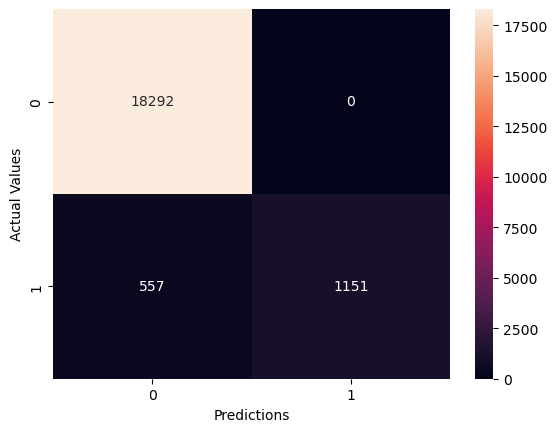

In [215]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict
dt_pred = best_dt_model.predict(xtest_scaled)

# Classification report & confusion matrix
report = classification_report(ytest, dt_pred, digits=5)
matrix = confusion_matrix(ytest, dt_pred)

print("Classification Report: \n", report)
print("Confusion Matrix: \n", matrix)

# multiple metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(best_dt_model, xtrain_scaled, ytrain, cv=5, scoring=scoring)

for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize()} scores: {scores}")
    print(f"Mean {metric}: {scores.mean()*100:.2f}%\n")

# Cross-Validate Models
cv_scores = cross_val_score(best_dt_model, xtrain_scaled, ytrain, cv = 5)
mean_cv_score_percentage = cv_scores.mean() * 100
print(f'\nCross-Validation Scores: {cv_scores}')
print(f'Mean CV Score -  dt Model: {mean_cv_score_percentage:.2f}%')
print("-" * 50)

sns.heatmap(matrix, annot = True, fmt = 'g')
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.show()

### Logistic Regression

In [216]:
Classifiers[2][0]

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [217]:
LogisticRegression()

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [218]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)

In [219]:
param_dist_lr = {
    'penalty': ['elasticnet'],   
    'C': loguniform(1e-3, 1e3),                
    'solver': ['saga'], 
    'l1_ratio': np.linspace(0, 1, 5),
    'max_iter': [100, 500, 1000],
    'class_weight':[{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:4}]
}

In [220]:
# Initializing Grid Search

lr_rs = RandomizedSearchCV(estimator= lr_model, param_distributions = param_dist_lr, random_state=42, verbose=2, n_iter=50, cv=5, n_jobs =-1)

In [221]:
lr_rs.fit(xtrain_scaled, ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,estimator,LogisticRegre...ndom_state=42)
,param_distributions,"{'C': <scipy.stats....0018A02517450>, 'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}, ...], 'l1_ratio': array([0. , ..., 0.75, 1. ]), 'max_iter': [100, 500, ...], ...}"
,n_iter,50
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [224]:
print('Best Parameters:', lr_rs.best_params_)

Best Parameters: {'C': 0.018794668241638456, 'class_weight': {0: 1, 1: 2}, 'l1_ratio': 0.0, 'max_iter': 500, 'penalty': 'elasticnet', 'solver': 'saga'}


In [225]:
print("Best cross-val score:", lr_rs.best_score_)

Best cross-val score: 0.9581875


In [226]:
print("Test Set Score:", lr_rs.score(xtest_scaled, ytest))

Test Set Score: 0.9564


In [227]:
best_lr_model = lr_rs.best_estimator_

### Model Evaluation after Hyper parameter tuning

Classification Report: 
               precision    recall  f1-score   support

           0    0.96453   0.98868   0.97646     18292
           1    0.83440   0.61066   0.70521      1708

    accuracy                        0.95640     20000
   macro avg    0.89947   0.79967   0.84083     20000
weighted avg    0.95342   0.95640   0.95329     20000

Confusion Matrix: 
 [[18085   207]
 [  665  1043]]
Accuracy scores: [0.9578125 0.957     0.9581875 0.9598125 0.958125 ]
Mean accuracy: 95.82%

Precision scores: [0.85025641 0.81965649 0.83609756 0.85657371 0.85261003]
Mean precision: 84.30%

Recall scores: [0.61045655 0.63254786 0.63107511 0.63281825 0.6129507 ]
Mean recall: 62.40%

F1 scores: [0.71067295 0.71404821 0.71926144 0.72788828 0.71318493]
Mean f1: 71.70%


Cross-Validation Scores: [0.9578125 0.957     0.9581875 0.9598125 0.958125 ]
Mean CV Score - lr model: 95.82%
--------------------------------------------------


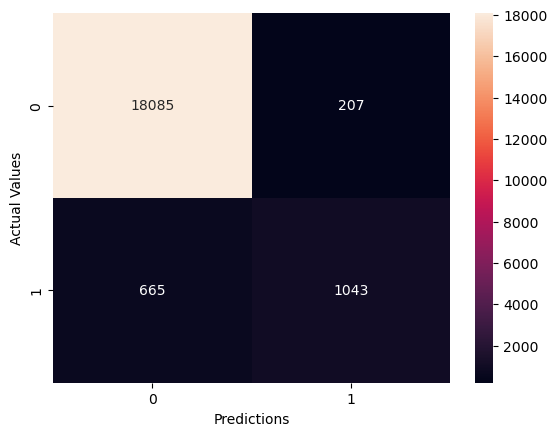

In [228]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict
lr_pred = best_lr_model.predict(xtest_scaled)

report = classification_report(ytest, lr_pred, digits=5)
matrix = confusion_matrix(ytest, lr_pred)

print("Classification Report: \n", report)
print("Confusion Matrix: \n", matrix)

scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(best_lr_model, xtrain_scaled, ytrain, cv=5, scoring=scoring)

for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize()} scores: {scores}")
    print(f"Mean {metric}: {scores.mean()*100:.2f}%\n")

# Cross-Validate Models
cv_scores = cross_val_score(best_lr_model, xtrain_scaled, ytrain, cv = 5)
mean_cv_score_percentage = cv_scores.mean() * 100
print(f'\nCross-Validation Scores: {cv_scores}')
print(f'Mean CV Score - lr model: {mean_cv_score_percentage:.2f}%')
print("-" * 50)

sns.heatmap(matrix, annot = True, fmt = 'g')
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.show()

### Random Forest Classifier

In [222]:
rf_model = RandomForestClassifier(random_state=42)
Classifiers[3][0]

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [223]:
RandomForestClassifier()

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
param_dist_rf = { 
    "n_estimators": randint(50, 300),
    "max_depth": randint(3, 30),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 20), 
    "max_features": ["sqrt", "log2", None], 
    "bootstrap": [True, False],  
    "criterion": ["gini", "entropy", "log_loss"],
    'class_weight':[{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:4}]
}

In [ ]:
# Initializing Grid Search

rf_rs = RandomizedSearchCV(estimator= rf_model, param_distributions = param_dist_rf, random_state=42, verbose=2, n_iter=50, cv=5, n_jobs =-1)

In [103]:
rf_rs.fit(xtrain_scaled, ytrain)

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}, ...], 'criterion': ['gini', 'entropy', ...], 'max_depth': <scipy.stats....0018A0269ECD0>, ...}"
,n_iter,50
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [104]:
print('Best Parameters:', rf_rs.best_params_)

Best Parameters: {'bootstrap': False, 'class_weight': {0: 1, 1: 3}, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 224}


In [105]:
print("Best cross-val score:", rf_rs.best_score_)

Best cross-val score: 0.9718249999999999


In [106]:
print("Test Set Score:", rf_rs.score(xtest_scaled, ytest))

Test Set Score: 0.97215


In [107]:
best_rf_model = rf_rs.best_estimator_

### Model Evaluation after Hyper parameter tuning

Classification Report: 
               precision    recall  f1-score   support

           0    0.97055   0.99989   0.98500     18292
           1    0.99827   0.67506   0.80545      1708

    accuracy                        0.97215     20000
   macro avg    0.98441   0.83747   0.89523     20000
weighted avg    0.97292   0.97215   0.96967     20000

Confusion Matrix: 
 [[18290     2]
 [  555  1153]]
Accuracy scores: [0.9711875 0.9719375 0.972375  0.9723125 0.9713125]
Mean accuracy: 97.18%

Precision scores: [1.         0.99563795 0.99460043 0.9967462  0.99778761]
Mean precision: 99.70%

Recall scores: [0.66053019 0.67231222 0.67820324 0.67623252 0.66372333]
Mean recall: 67.02%

F1 scores: [0.79556541 0.80263736 0.80647986 0.80578694 0.7971719 ]
Mean f1: 80.15%


Cross-Validation F1 Scores: [0.9711875 0.9719375 0.972375  0.9723125 0.9713125]
Mean CV Score - rf model: 97.18%
--------------------------------------------------


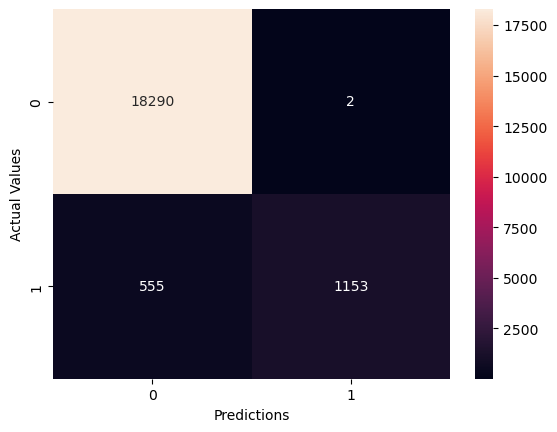

In [108]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict
rf_pred = best_rf_model.predict(xtest_scaled)

report = classification_report(ytest, rf_pred, digits=5)
matrix = confusion_matrix(ytest, rf_pred)

print("Classification Report: \n", report)
print("Confusion Matrix: \n", matrix)

scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(best_rf_model, xtrain_scaled, ytrain, cv=5, scoring=scoring)

for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize()} scores: {scores}")
    print(f"Mean {metric}: {scores.mean()*100:.2f}%\n")

# Cross-Validate Models
cv_scores = cross_val_score(best_rf_model, xtrain_scaled, ytrain, cv = 5)
mean_cv_score_percentage = cv_scores.mean() * 100
print(f'\nCross-Validation F1 Scores: {cv_scores}')
print(f'Mean CV Score - rf model: {mean_cv_score_percentage:.2f}%')
print("-" * 50)


sns.heatmap(matrix, annot = True, fmt = 'g')
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.show()

### XGB Classifier

In [109]:
xgb_model = XGBClassifier(random_state=42)

In [110]:
Classifiers[4][0]

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [111]:
XGBClassifier()

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [112]:
from scipy.stats import uniform, randint

param_dist_xgb = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.3),        
    'subsample': uniform(0.5, 0.5),              
    'colsample_bytree': uniform(0.5, 0.5),       
    'gamma': uniform(0, 5),                      
    'reg_alpha': uniform(0, 1),                  
    'reg_lambda': uniform(0, 1), 
    'scale_pos_weight': randint(1, 10)
}

In [113]:
# Initializing Grid Search

xgb_rs = RandomizedSearchCV(estimator= xgb_model, param_distributions = param_dist_xgb, random_state=42, verbose=2, n_iter=50, cv=5, n_jobs =-1) 

In [121]:
xgb_rs.fit(xtrain_scaled, ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': <scipy.stats....0018A0229E190>, 'gamma': <scipy.stats....0018A02686B10>, 'learning_rate': <scipy.stats....0018A049D1090>, 'max_depth': <scipy.stats....0018A024B2C50>, ...}"
,n_iter,50
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [122]:
print('Best Parameters:', xgb_rs.best_params_)

Best Parameters: {'colsample_bytree': 0.5090376818077604, 'gamma': 2.469468575917173, 'learning_rate': 0.06364681276639864, 'max_depth': 10, 'n_estimators': 995, 'reg_alpha': 0.7441705230565623, 'reg_lambda': 0.7209399242521293, 'scale_pos_weight': 1, 'subsample': 0.7712701152774497}


In [123]:
print("Best cross-val score:", xgb_rs.best_score_)

Best cross-val score: 0.9718499999999999


In [125]:
print("Test Set Score:", xgb_rs.score(xtest_scaled, ytest))

Test Set Score: 0.9723


In [124]:
best_xgb_model = xgb_rs.best_estimator_

#### Model Evaluation after hyper parameter tuning

Classification Report: 
               precision    recall  f1-score   support

           0    0.97140   0.99913   0.98507     18292
           1    0.98651   0.68501   0.80857      1708

    accuracy                        0.97230     20000
   macro avg    0.97896   0.84207   0.89682     20000
weighted avg    0.97269   0.97230   0.97000     20000

Confusion Matrix: 
 [[18276    16]
 [  538  1170]]
Accuracy scores: [0.9714375 0.971625  0.9719375 0.972125  0.9715625]
Mean accuracy: 97.17%

Precision scores: [0.98702703 0.97679325 0.97098446 0.97207859 0.97881356]
Mean precision: 97.71%

Recall scores: [0.67231222 0.68188513 0.68998527 0.69168506 0.6799117 ]
Mean recall: 68.32%

F1 scores: [0.79982479 0.80312229 0.80671545 0.80825451 0.80243161]
Mean f1: 80.41%


Cross-Validation F1 Scores: [0.9714375 0.971625  0.9719375 0.972125  0.9715625]
Mean CV Score - xgb model: 97.17%
--------------------------------------------------


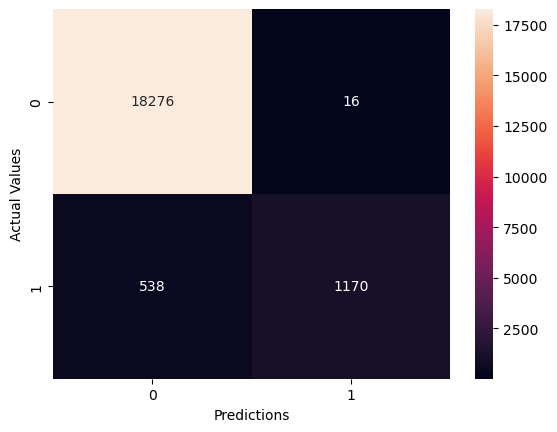

In [128]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict
xgb_pred = best_xgb_model.predict(xtest_scaled)

report = classification_report(ytest, xgb_pred, digits=5)
matrix = confusion_matrix(ytest, xgb_pred)

print("Classification Report: \n", report)
print("Confusion Matrix: \n", matrix)

scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(best_xgb_model, xtrain_scaled, ytrain, cv=5, scoring=scoring)

for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize()} scores: {scores}")
    print(f"Mean {metric}: {scores.mean()*100:.2f}%\n")

# Cross-Validate Models
cv_scores = cross_val_score(best_xgb_model, xtrain_scaled, ytrain, cv = 5)
mean_cv_score_percentage = cv_scores.mean() * 100
print(f'\nCross-Validation F1 Scores: {cv_scores}')
print(f'Mean CV Score - xgb model: {mean_cv_score_percentage:.2f}%')
print("-" * 50)

sns.heatmap(matrix, annot = True, fmt = 'g')
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.show()

#### Observation

•	After Hyperparamter tuning of the models, best_xgb_model had the overall best performance with best_rf_model closely following. best_xgb_model is preffered because it has a high accuracy (97.17%), precision (97.71%), highest F1-Score (80.41%) and best recall (68.32%). best_xgb_model identifies more diabetes cases and misses a fewer real cases compared to best_rf_model.

### Model Evaluation before and after hyper parameter tuning 

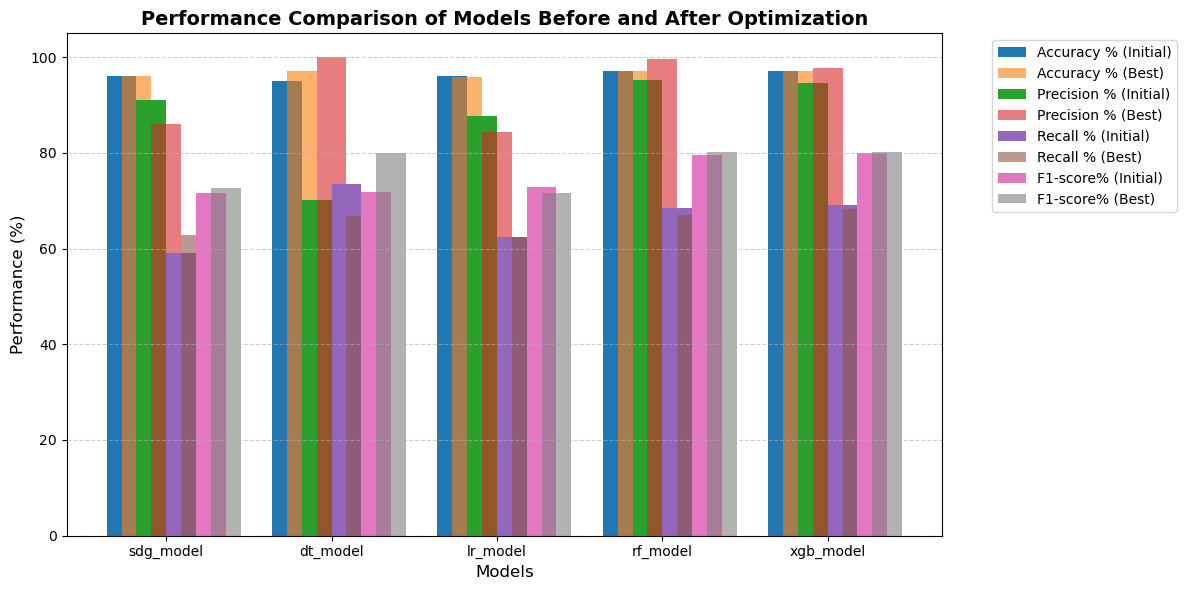

In [127]:
Models = {
    'Model Name': ['sdg_model', 'dt_model', 'lr_model', 'rf_model', 'xgb_model'],
    'Accuracy %': [96.03, 95.09, 96.06, 97.03, 97.05],
    'Precision %': [91.07, 70.12, 87.62, 95.22, 94.72],
    'Recall %': [59.14, 73.45, 62.41, 68.45, 69.14],
    'F1-score%': [71.61, 71.74, 72.89, 79.64, 79.93],
    'Best Model Name': ['best_sdg_model', 'best_dt_model', 'best_lr_model', 'best_rf_model', 'best_xgb_model'],
    'Accuracy1 %': [95.98, 97.18, 95.82, 97.18, 97.17],
    'Precision1 %': [86.10, 100, 84.30, 99.70, 97.71],
    'Recall1 %': [62.81, 66.78, 62.40, 67.02, 68.32],
    'F1-score1%': [72.63, 80.08, 71.70, 80.15, 80.14]
}

# Create a DataFrame
df = pd.DataFrame(Models)

# Set figure size
plt.figure(figsize=(12, 6))

# Define metrics to plot
metrics = ['Accuracy %', 'Precision %', 'Recall %', 'F1-score%']
best_metrics = ['Accuracy1 %', 'Precision1 %', 'Recall1 %', 'F1-score1%']
x = np.arange(len(df['Model Name']))  # model positions
width = 0.18  # bar width

# Plot bars for each metric
for i, (metric, best_metric) in enumerate(zip(metrics, best_metrics)):
    plt.bar(x + i * width, df[metric], width=width, label=metric + ' (Initial)')
    plt.bar(x + i * width + width/2, df[best_metric], width=width, label=metric + ' (Best)', alpha=0.6)

# Customize the plot
plt.xticks(x + width * 1.5, df['Model Name'])
plt.xlabel('Models', fontsize=12)
plt.ylabel('Performance (%)', fontsize=12)
plt.title('Performance Comparison of Models Before and After Optimization', fontsize=14, weight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

### Feature Importance of best performing model

In [129]:
best_xgb_model.feature_importances_

array([0.01154577, 0.07654016, 0.08738697, 0.05583068, 0.02173566,
       0.032125  , 0.44435108, 0.27048466], dtype=float32)

In [130]:
xtrain.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75220,1,73,0,0,3,24.77,3.5,80
48955,1,80,0,0,4,24.60,5.7,145


In [131]:
xtrain.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')

In [132]:
importance = best_xgb_model.feature_importances_

In [133]:
feature_names = xtrain.columns

In [134]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

In [135]:
feature_importance_df

,Feature,Importance
0,gender,0.011546
1,age,0.076540
2,hypertension,0.087387
3,heart_disease,0.055831
4,smoking_history,0.021736
5,bmi,0.032125
6,HbA1c_level,0.444351
7,blood_glucose_level,0.270485


In [136]:
feature_importance_df = feature_importance_df.sort_values(by = "Importance", ascending =False)
feature_importance_df

,Feature,Importance
6,HbA1c_level,0.444351
7,blood_glucose_level,0.270485
2,hypertension,0.087387
1,age,0.076540
3,heart_disease,0.055831
5,bmi,0.032125
4,smoking_history,0.021736
0,gender,0.011546


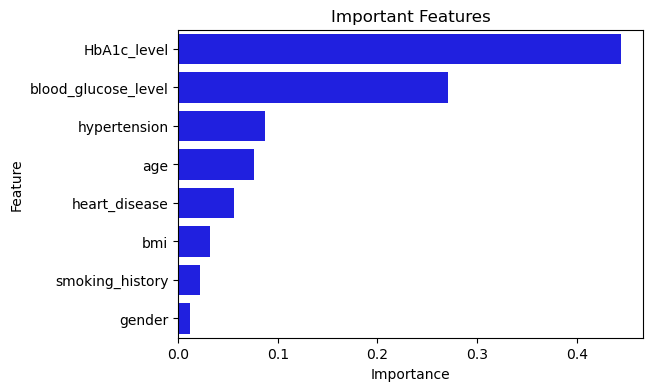

In [137]:
# plot a chart of important features 
plt.figure(figsize =(6, 4))
sns.barplot(data=feature_importance_df.sort_values(by="Importance", ascending = False), x="Importance", y="Feature", color="Blue")
plt.title("Important Features")
plt.show()

#### Observation

•	The plot shows the five most influential features used by the model to predict diabetes cases.

•	HbAc1c_level is the strongest predictor, followed by blood_glucose_level, with other health indicators(age, hypertension and heart disease) playing smaller but still relevant roles in the model's prediction.

### Evaluating Model Performance with the five important features

C:\Users\josep\AppData\Local\Temp\ipykernel_6568\3862529377.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_shap_values[:5], y=mean_shap_values.index[:5], palette="viridis")


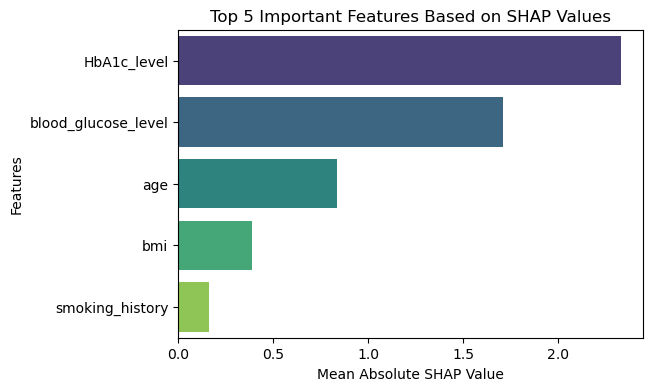

In [138]:
import shap

# Compute SHAP values
explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(xtest_scaled)

# Convert SHAP values to DataFrame, using the original feature names from xtest (before scaling)
# xtest was the original DataFrame before scaling
shap_df = pd.DataFrame(shap_values, columns=xtest.columns)

# Compute mean absolute SHAP values for feature importance
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)

# Plot top 5 features
plt.figure(figsize=(6, 4))
sns.barplot(x=mean_shap_values[:5], y=mean_shap_values.index[:5], palette="viridis")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Features")
plt.title("Top 5 Important Features Based on SHAP Values")
plt.show()

#### Observation

•	The bar chart displays the mean absolute SHAP values for the top 5 features influencing the model’s predictions of diabetes with HbA1c_level having the highest mean SHAP value, indicating it is the most influential factor in predicting diabetes in the model. 

•	The model heavily relies on this feature when distinguishing between diabetic and non-diabetic individuals while smoking history is the least impactful among the top 5 features.

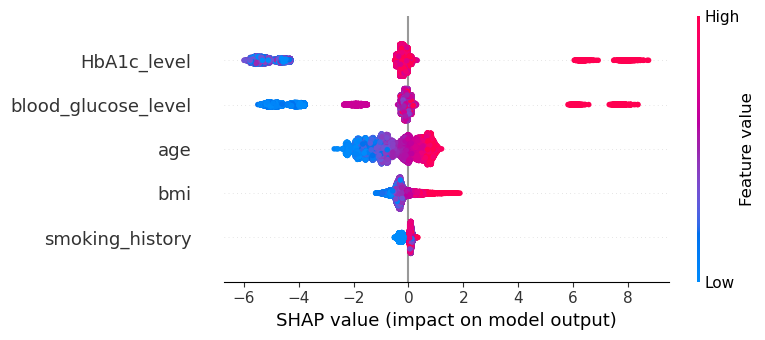

In [139]:
# Detailed summary plot showing only the top 5 features, using the original DataFrame with feature names
shap.summary_plot(shap_values, pd.DataFrame(xtest_scaled, columns=xtest.columns), max_display=5)

#### Observation


•	The SHAP summary plot illustrates both the magnitude and direction of each feature’s influence on the model’s predictions for diabetes. Each point represents a single observation, with colors indicating the feature value (red = high, blue = low) and the position on the x-axis showing the SHAP value, i.e, the feature’s impact on the model output.

•	HbA1c level demonstrates the strongest and most consistent positive influence on predicting diabetes. High HbA1c values (red points to the right) substantially increase the model’s prediction probability.

•	Blood glucose level shows a strong positive relationship, where higher glucose readings shift predictions toward diabetes, reinforcing its diagnostic relevance.

•	Age, higher values (red points) generally correspond with positive SHAP values, suggesting that older individuals are more likely to be classified as diabetic by the model.

•	BMI feature exhibits a moderate influence, with higher BMI values (red points) slightly increasing the prediction probability, reflecting the known association between obesity and diabetes risk.

•	Smoking history has a comparatively minor effect on the model. Its SHAP values cluster near zero, indicating that variations in smoking history have limited impact on the model’s output


Confusion Matrix:
 [[18284     8]
 [  547  1161]]
Classification Report (Top 5 Features):

              precision    recall  f1-score   support

           0    0.97095   0.99956   0.98505     18292
           1    0.99316   0.67974   0.80709      1708

    accuracy                        0.97225     20000
   macro avg    0.98205   0.83965   0.89607     20000
weighted avg    0.97285   0.97225   0.96985     20000

Accuracy scores: [0.97175   0.972     0.971875  0.9723125 0.97125  ]
Mean accuracy: 97.18%

Precision scores: [0.9978022  0.98819742 0.98195329 0.98619958 0.98699892]
Mean precision: 98.82%

Recall scores: [0.66863034 0.67820324 0.68114875 0.68359088 0.67034584]
Mean recall: 67.64%

F1 scores: [0.80070547 0.80436681 0.80434783 0.80747501 0.79842244]
Mean f1: 80.31%


Cross-Validation F1 Scores (Top 5 Features): [0.97175   0.972     0.971875  0.9723125 0.97125  ]
Mean CV F1 Score (Top 5 Features): 97.18%


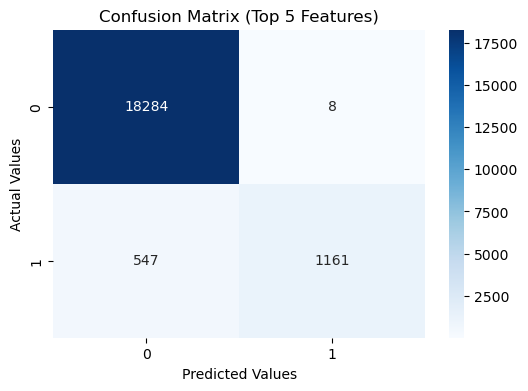

In [140]:
# Step 1: Define top 5 SHAP features
top_features = ['HbA1c_level', 'blood_glucose_level', 'age', 'bmi', 'smoking_history']

# Step 2: Select only these features from the original scaled data 
top_feature_indices = [xtrain.columns.get_loc(feat) for feat in top_features]
xtrain_top5 = xtrain_scaled[:, top_feature_indices]
xtest_top5 = xtest_scaled[:, top_feature_indices]

# Step 3: Retrain model on top 5 features 
xgb_top5 = best_xgb_model

xgb_top5.fit(xtrain_top5, ytrain)

# Step 4: Predict and Evaluate 
xgb_pred_top5 = xgb_top5.predict(xtest_top5)

# Confusion Matrix 
matrix = confusion_matrix(ytest, xgb_pred_top5)
print("Confusion Matrix:\n", matrix)

print("Classification Report (Top 5 Features):\n")
print(classification_report(ytest, xgb_pred_top5, digits=5))

# Cross-validation 
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(xgb_top5, xtrain_top5, ytrain, cv=5, scoring=scoring)

for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize()} scores: {scores}")
    print(f"Mean {metric}: {scores.mean()*100:.2f}%\n")

# F1 Cross-validation mean
cv_scores = cross_val_score(xgb_top5, xtrain_top5, ytrain, cv=5)
print(f"\nCross-Validation F1 Scores (Top 5 Features): {cv_scores}")
print(f"Mean CV F1 Score (Top 5 Features): {cv_scores.mean() * 100:.2f}%")

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix (Top 5 Features)")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

#### Observation

•	After evaluating the model considering only five important features, the model slightly performed better than the best_xgb_model with slightly higher accuracy(97.18%) and precision(98.82%).